In [45]:
#test_Y3wMUE5_7gLdaTN.csv      ,train_u6lujuX_CVtuZ9i.csv

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [48]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df_train.drop('Loan_ID',axis = 1,inplace = True)
df_test.drop('Loan_ID',axis = 1,inplace = True)

In [50]:
df_train.shape

(614, 12)

In [51]:
df_test.shape

(367, 11)

# CHeck Missing Values

In [52]:
train_null = df_train.isnull().sum()

In [53]:
null_cool_tn = train_null[train_null>0].keys

In [54]:
null_cool_tn

<bound method Series.keys of Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64>

In [55]:
null_cool_tn = ['Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Gender']

In [56]:
test_null = df_test.isnull().sum()

In [57]:
null_col_ts = test_null[test_null>0].keys

In [58]:
null_col_ts

<bound method Series.keys of Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64>

In [59]:
null_col_ts = ['Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Gender']

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
simple = SimpleImputer(strategy="most_frequent")
simple.fit(df_train[null_cool_tn])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [62]:
c = df_train.columns.tolist()

In [63]:
df_train[null_cool_tn] = simple.transform(df_train[null_cool_tn])

In [64]:
#dftrain = pd.DataFrame(df_train_clean,columns = c)

In [65]:
simple.fit(df_test[null_col_ts])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [66]:
df_test[null_col_ts] = simple.transform(df_test[null_col_ts])

In [67]:
#c1 = df_test.columns.tolist()

In [68]:
#dftest = pd.DataFrame(df_test_clean,columns = c1)

In [69]:
#dftest.shape

In [70]:
dftrain = df_train

In [71]:
dftest = df_test

# EDA

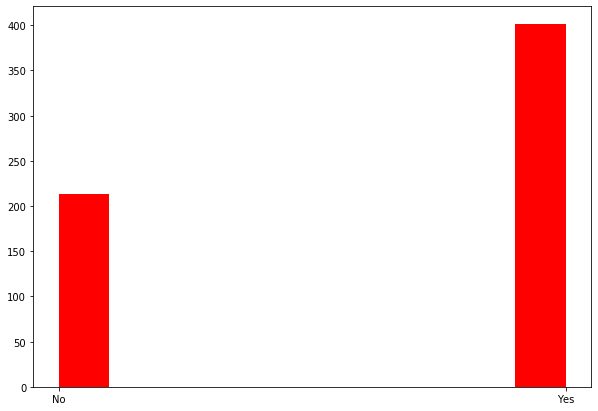

In [72]:
plt.figure(figsize = (10,7))
plt.hist('Married',data =dftrain ,bins = 10,color = 'red')
plt.show()

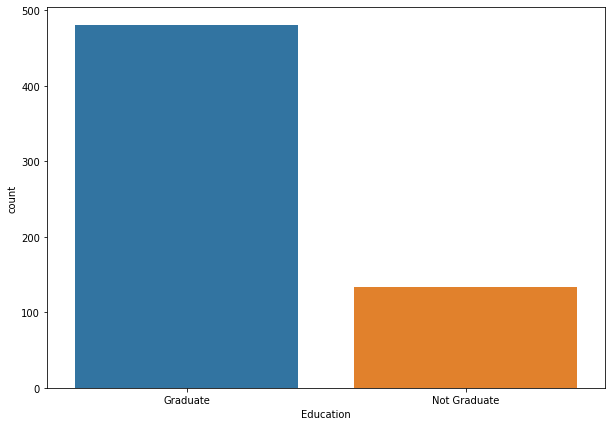

In [73]:
plt.figure(figsize = (10,7))
sns.countplot('Education',data =dftrain)
plt.show()

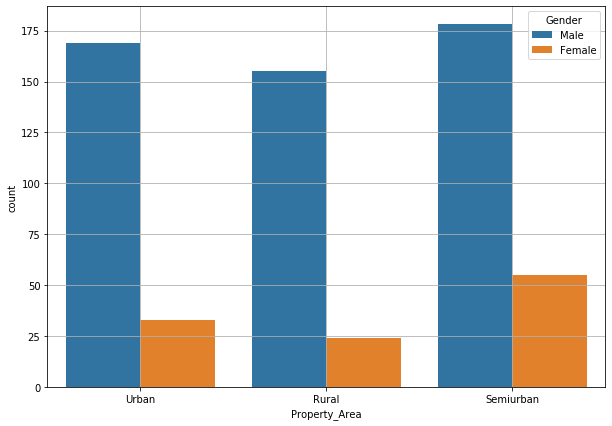

In [74]:
plt.figure(figsize = (10,7))
sns.countplot('Property_Area', hue = 'Gender',data = dftrain )
plt.grid()
plt.show()

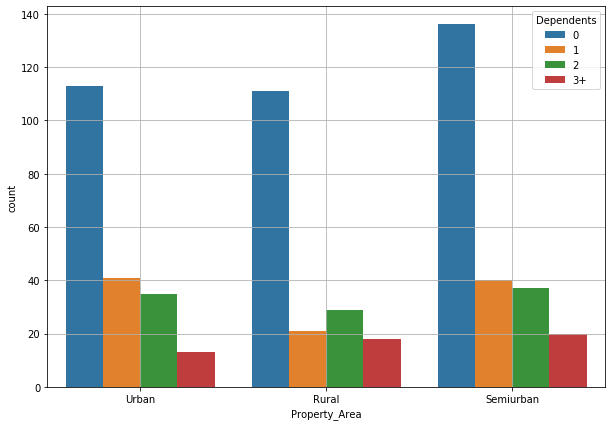

In [75]:
plt.figure(figsize = (10,7))
sns.countplot('Property_Area', hue = 'Dependents',data = dftrain )
plt.grid()
plt.show()

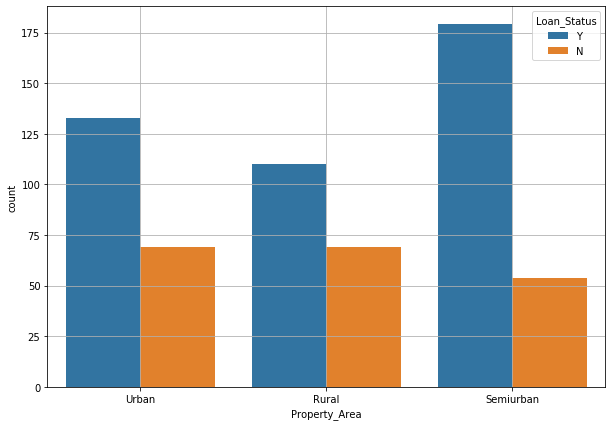

In [76]:
plt.figure(figsize = (10,7))
sns.countplot('Property_Area', hue = 'Loan_Status',data = dftrain )
plt.grid()
plt.show()

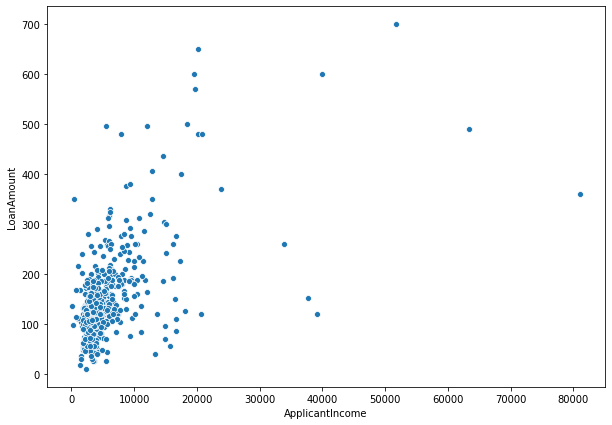

In [77]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'ApplicantIncome',y = 'LoanAmount', data = dftrain, )
plt.show()

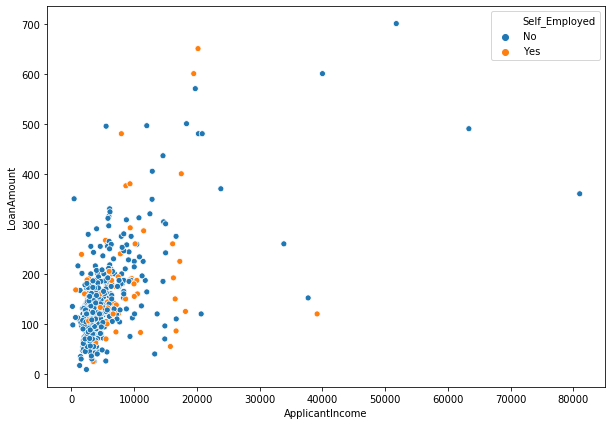

In [78]:
#Self_Employed
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'ApplicantIncome',y = 'LoanAmount',hue='Self_Employed', data = dftrain, )
plt.show()

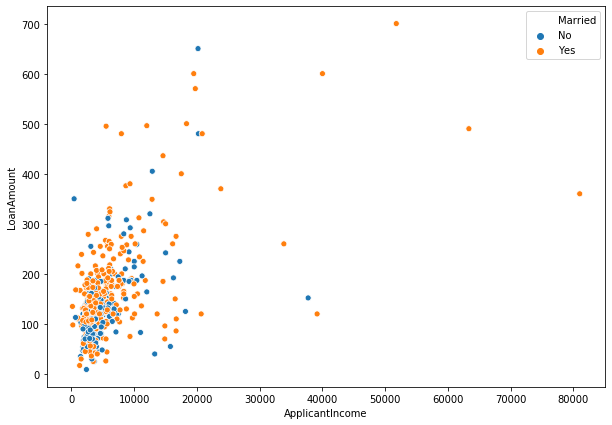

In [79]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = 'ApplicantIncome',y = 'LoanAmount',hue='Married', data = dftrain, )
plt.show()

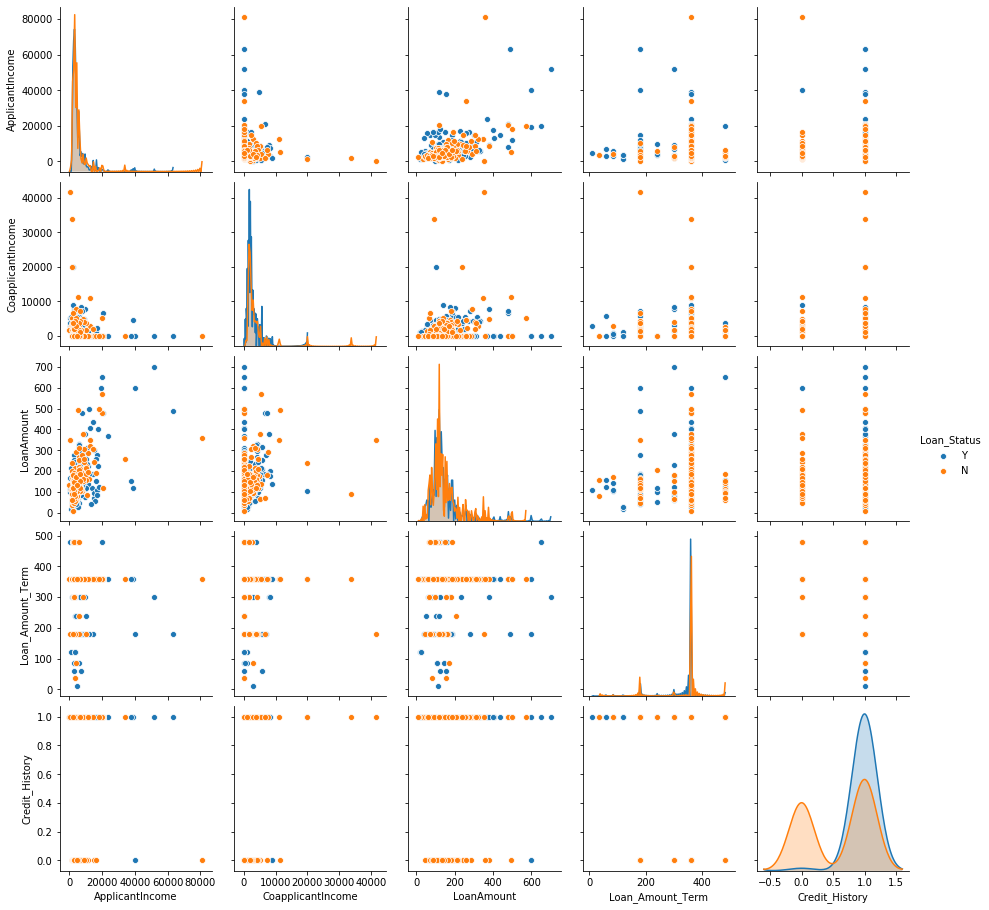

In [80]:
sns.pairplot(dftrain,hue='Loan_Status' ,diag_kws={'bw': 0.2})

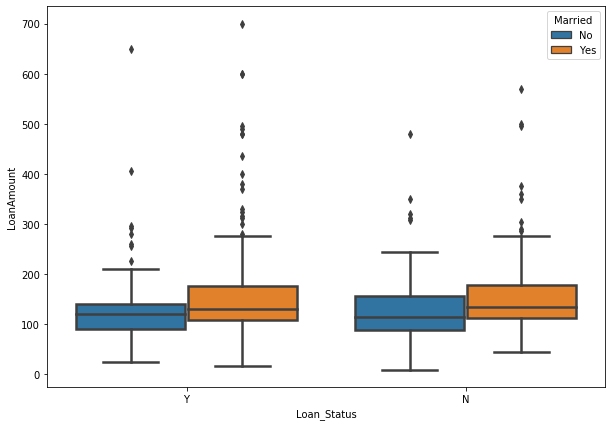

In [81]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'LoanAmount',x = 'Loan_Status',data=dftrain,hue = "Married",linewidth = 2.5)
plt.show()

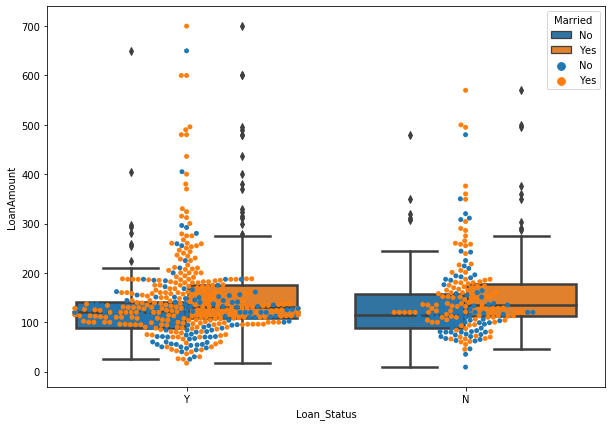

In [82]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'LoanAmount',x = 'Loan_Status',data=dftrain,hue = "Married",linewidth = 2.5)
sns.swarmplot(y = 'LoanAmount',x = 'Loan_Status',data=dftrain,hue = "Married")
plt.show()

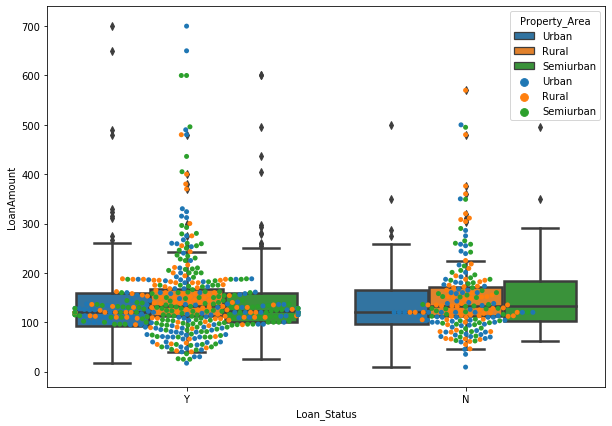

In [83]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'LoanAmount',x = 'Loan_Status',data=dftrain,hue = "Property_Area",linewidth = 2.5)
sns.swarmplot(y = 'LoanAmount',x = 'Loan_Status',data=dftrain,hue = "Property_Area")
plt.show()

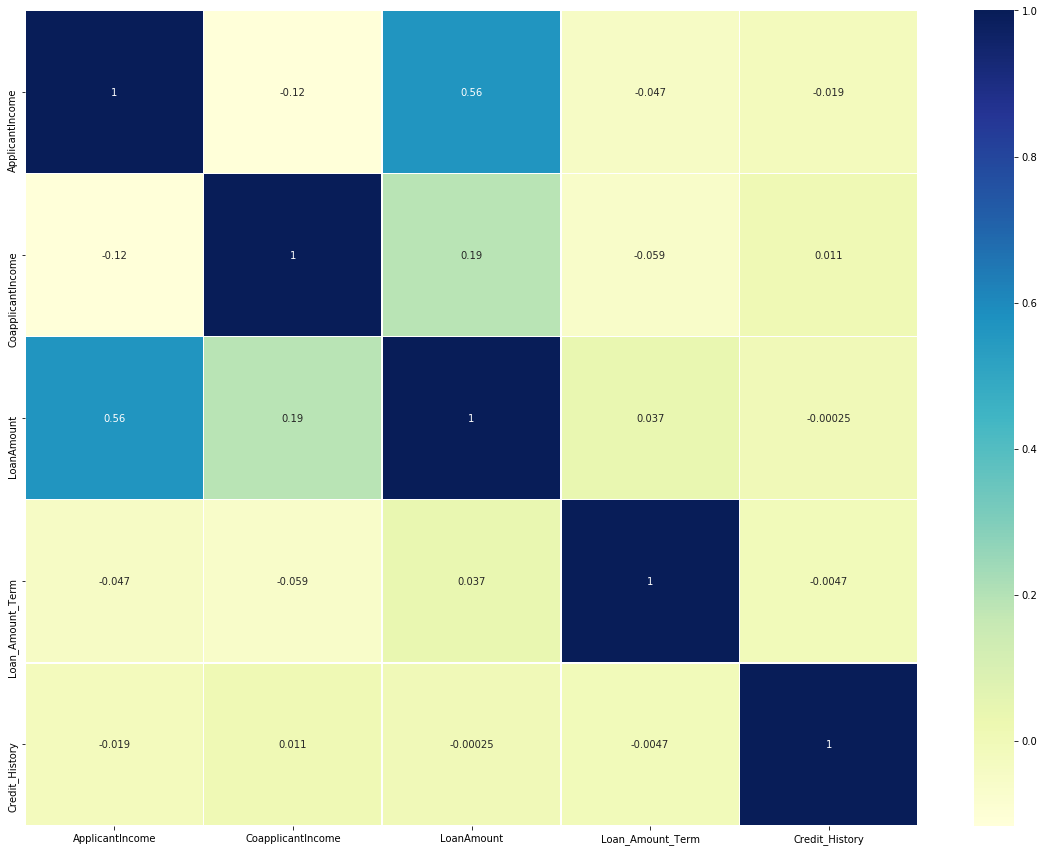

In [84]:
plt.figure(figsize = (20,15))
sns.heatmap(dftrain.corr(),annot = True,linewidths=.5,cmap="YlGnBu")

In [85]:
len(dftrain.shape)

2

In [86]:
dftrain.isnull().sum().sum()

0

In [87]:
dftrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
x  = pd.get_dummies(dftrain,drop_first=True)


In [114]:
Y_test =pd.get_dummies(dftest,drop_first=True)

In [91]:
x.shape

(614, 15)

In [101]:
X = x.drop('Loan_Status_Y',axis = 1)
Y = x['Loan_Status_Y']

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)


In [105]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()

In [106]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
lr.predict(Y_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [107]:
lr.score(x_test,y_test)

0.7987012987012987

In [108]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [110]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [111]:
rf_random.score(x_test,y_test)

0.7922077922077922

In [115]:
rf_random.predict(Y_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,